# $\Pi^k$ operator tutorial and math background

In [ ]:
from Bachelier import *


$$
  f_z = \Pi^k(x,z,f(z)=[])
$$
where 

- $x \in \mathbb{R}^{ N_x \times D}$ is any set of points generated by a i.i.d sample of $X(t_1)$ where $t_1$ is any time.

- $z \in \mathbb{R}^{ N_z \times D}$ is any set of points, generated by a i.i.d sample of $X(t_2)$ at any time $t_2>t_1$.

- $f(z) \in \mathbb{R}^{ N_z \times D_f}$ is any, optional, function, representing payoff values. 

Consider the following simple example:

In [ ]:
m, n, D = 20, 20, 2
xs = np.reshape(np.random.randn(m, D) * 0.5, (m,D))
ys = np.reshape(np.random.randn(n, D) * 0.4, (n,D))

In [ ]:
X = alg.Pi(xs,ys)

# 2D Case:

In [3]:
D, Nx,Ny,Nz = 2, 300,300,300
data_ = data_generator_Bachelier(seed1 = 42, seed2 = 35, seed3 = 37)
data_.set_data(D, Nx,Ny,Nz)
x,z,fx,fz = data_.x,data_.z,data_.fx,data_.fz

vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.06537943686932192 , mean(fz): 0.07010191616222297


In [15]:
scenarios_list = [ (2, 2**(i-2), 2**(i-2), 2**(i-2))  for i in np.arange(8,15,1)]
print(scenarios_list)

[(2, 64, 64, 64), (2, 128, 128, 128), (2, 256, 256, 256), (2, 512, 512, 512), (2, 1024, 1024, 1024), (2, 2048, 2048, 2048), (2, 4096, 4096, 4096)]


In [16]:
data_ = data_generator_Bachelier_iid(seed1 = 42, seed2 = 35, seed3 = 37)

In [17]:
accumulator_ = Bachelier_accumulator()
scenarios = scenario_generator(data_,codpy_predictor(),Bachelier_accumulator())
scenarios.run_scenarios(scenarios_list)
results = scenarios.accumulator.get_output_datas()

 d: 2  nx: 64  ny: 64  nz: 64
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.07406920493631997 , mean(fz): 0.07843704087822603
mean(fx): 0.0932595090593775 , mean(fz): 0.07843704087822603
mean(fx): 0.0932595090593775 , mean(fz): 0.07843704087822603 , mean(f_z): 0.11494425596818128
predictor: codpy, Nx=64, Ny=64  d: 2  nx: 64  ny: 64  nz: 64
 d: 2  nx: 128  ny: 128  nz: 128
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.07282134171607742 , mean(fz): 0.0662191480195721
mean(fx): 0.08487426397789388 , mean(fz): 0.0662191480195721
mean(fx): 0.08487426397789388 , mean(fz): 0.0662191480195721 , mean(f_z): 0.09135562058633766
predictor: codpy, Nx=128, Ny=128  d: 2  nx: 128  ny: 128  nz: 128
 d: 2  nx: 256  ny: 256  nz: 256
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.06921436013325898 , mean(fz): 0.07261036724363362
mean(fx): 0.072776304653767

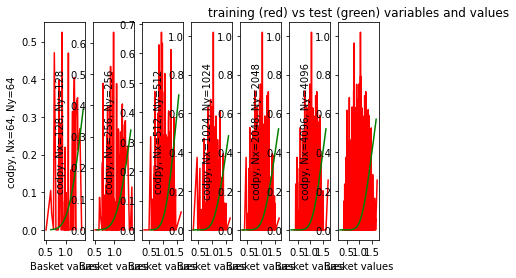

In [18]:
basketxs = data_.basket(x = scenarios.accumulator.get_xs())
basketzs = data_.basket(x = scenarios.accumulator.get_zs())
scenarios.accumulator.plot_learning_and_train_sets(basketxs,basketzs,labelx='Basket values',labelz='')

In [19]:
print(results)

                          D      Nx      Ny      Nz    ex. time sec.  \
codpy, Nx=64, Ny=64      2.0    64.0    64.0    64.0        0.030918   
codpy, Nx=128, Ny=128    2.0   128.0   128.0   128.0        0.106715   
codpy, Nx=256, Ny=256    2.0   256.0   256.0   256.0        0.587428   
codpy, Nx=512, Ny=512    2.0   512.0   512.0   512.0        3.879653   
codpy, Nx=1024, Ny=1024  2.0  1024.0  1024.0  1024.0       19.058660   
codpy, Nx=2048, Ny=2048  2.0  2048.0  2048.0  2048.0      105.592433   
codpy, Nx=4096, Ny=4096  2.0  4096.0  4096.0  4096.0      582.172929   

                         RMSE error  norm fun  disc err  
codpy, Nx=64, Ny=64        0.180161  0.027372       NaN  
codpy, Nx=128, Ny=128      0.145838  0.002566       NaN  
codpy, Nx=256, Ny=256      0.058539  0.011343       NaN  
codpy, Nx=512, Ny=512      0.038064  0.005628       NaN  
codpy, Nx=1024, Ny=1024    0.036467  0.002953       NaN  
codpy, Nx=2048, Ny=2048    0.039672  0.002797       NaN  
codpy, Nx=4096, N

# 5D Case

In [20]:
D, Nx,Ny,Nz = 5, 300,300,300
data_ = data_generator_Bachelier(seed1 = 42, seed2 = 35, seed3 = 37)
data_.set_data(D, Nx,Ny,Nz)
x,z,fx,fz = data_.x,data_.z,data_.fx,data_.fz

vol basket : 0.2
vol underlying : [[ 0.37827935  0.          0.          0.          0.        ]
 [-0.09355646  0.11517707  0.          0.          0.        ]
 [-0.07072173  0.13433517  0.36801879  0.          0.        ]
 [ 0.14069139 -0.15323444 -0.05576193  0.40455624  0.        ]
 [-0.06406762  0.14853054  0.20335607  0.00842457  0.38097362]]
mean(fx): 0.08035478271852481 , mean(fz): 0.07215861763513232


In [21]:
accumulator_ = Bachelier_accumulator()
scenarios = scenario_generator(data_,codpy_predictor(),Bachelier_accumulator())
scenarios.run_scenarios(scenarios_list)
results = scenarios.accumulator.get_output_datas()

 d: 2  nx: 64  ny: 64  nz: 64
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.07406920493631997 , mean(fz): 0.07843704087822603
mean(fx): 0.07406920493631997 , mean(fz): 0.07843704087822603 , mean(f_z): 0.09388223426188116
predictor: codpy, Nx=64, Ny=64  d: 2  nx: 64  ny: 64  nz: 64
 d: 2  nx: 128  ny: 128  nz: 128
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.07282134171607742 , mean(fz): 0.0662191480195721
mean(fx): 0.07282134171607742 , mean(fz): 0.0662191480195721 , mean(f_z): 0.07887898765622652
predictor: codpy, Nx=128, Ny=128  d: 2  nx: 128  ny: 128  nz: 128
 d: 2  nx: 256  ny: 256  nz: 256
vol basket : 0.2
vol underlying : [[0.26649883 0.        ]
 [0.02311631 0.10195088]]
mean(fx): 0.06921436013325898 , mean(fz): 0.07261036724363362
mean(fx): 0.06921436013325898 , mean(fz): 0.07261036724363362 , mean(f_z): 0.07435097557955489
predictor: codpy, Nx=256, Ny=256  d: 2  nx: 256  ny: 

In [22]:
print(results)

                          D      Nx      Ny      Nz    ex. time sec.  \
codpy, Nx=64, Ny=64      2.0    64.0    64.0    64.0        0.037898   
codpy, Nx=128, Ny=128    2.0   128.0   128.0   128.0        0.117686   
codpy, Nx=256, Ny=256    2.0   256.0   256.0   256.0        0.617349   
codpy, Nx=512, Ny=512    2.0   512.0   512.0   512.0        3.880106   
codpy, Nx=1024, Ny=1024  2.0  1024.0  1024.0  1024.0       20.012196   
codpy, Nx=2048, Ny=2048  2.0  2048.0  2048.0  2048.0      106.830536   
codpy, Nx=4096, Ny=4096  2.0  4096.0  4096.0  4096.0      571.736789   

                         RMSE error  norm fun  disc err  
codpy, Nx=64, Ny=64        0.118355  0.251570       NaN  
codpy, Nx=128, Ny=128      0.095091  0.286855       NaN  
codpy, Nx=256, Ny=256      0.047205  0.163822       NaN  
codpy, Nx=512, Ny=512      0.037131  0.202589       NaN  
codpy, Nx=1024, Ny=1024    0.035168  0.190685       NaN  
codpy, Nx=2048, Ny=2048    0.037484  0.188774       NaN  
codpy, Nx=4096, N